# Seaborn: lmplot

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins').dropna()

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Basics

In [3]:
sns.set_style('white')

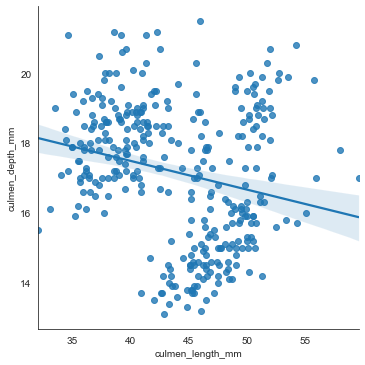

In [4]:
sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', data=df);

### `hue`

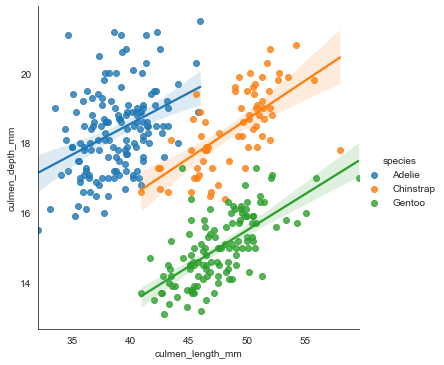

In [5]:
sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           hue='species',
           data=df
          );

### `markers`

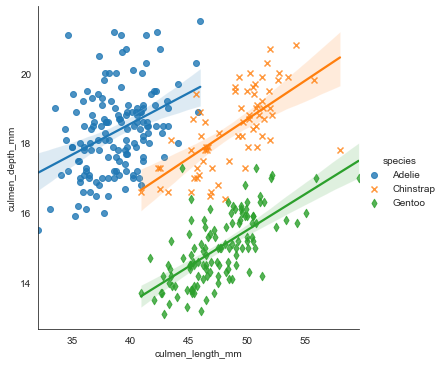

In [6]:
sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           hue='species',
           markers=['o', 'x', 'd'],
           data=df
          );

## Small Multiples (FacetGrid)

### `col`

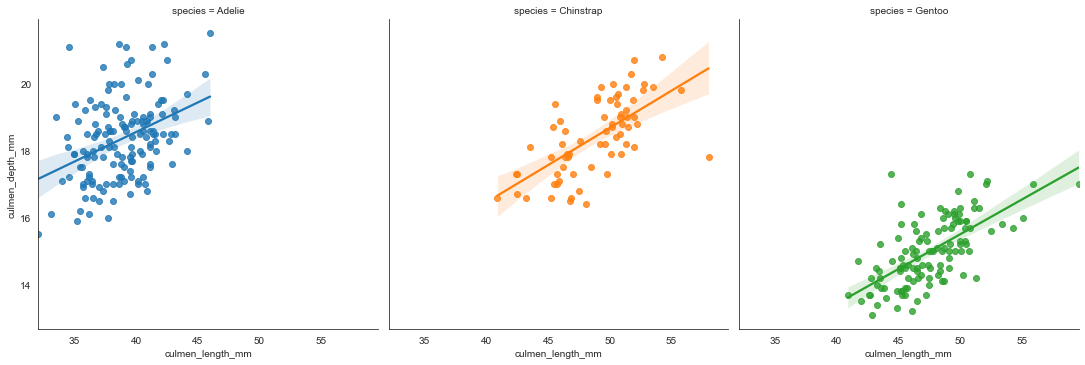

In [7]:
sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           hue='species',
           col='species',
           data=df
          );

### `row`

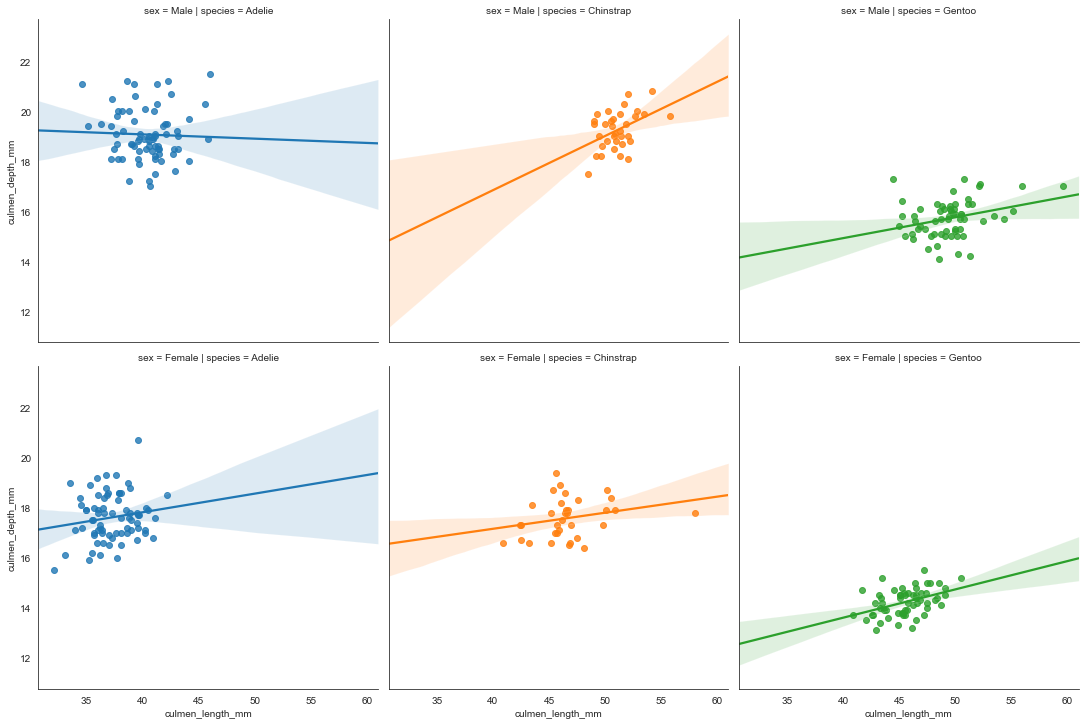

In [8]:
sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           hue='species',
           col='species',
           row='sex',
           truncate=False,
           data=df
          );

## Extras

### `x_bins`

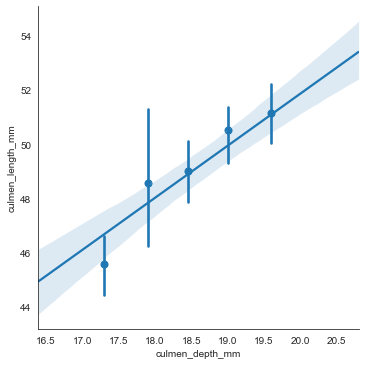

In [9]:
sns.lmplot(x='culmen_depth_mm', y='culmen_length_mm', 
           data=df[df.species=='Chinstrap'],
           x_bins=5
           );

### Other models: Logistic Regression, `logistic`

In [10]:
df['sex_binary'] = [(x == 'Male') for x in df.sex]

In [11]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_binary
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True


/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


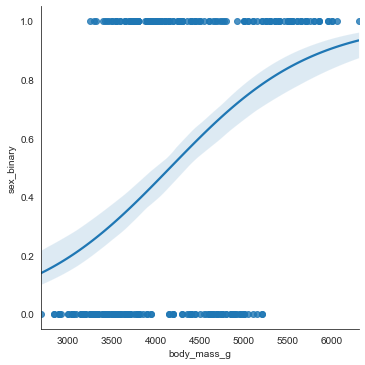

In [12]:
sns.lmplot(x='body_mass_g', y='sex_binary', data=df, logistic=True, n_boot=100);

/usr/local/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


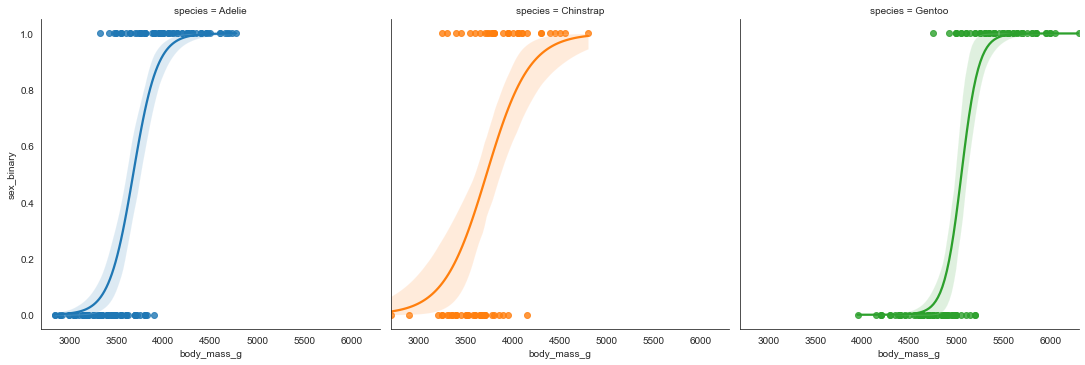

In [13]:
sns.lmplot(x='body_mass_g', y='sex_binary', data=df, logistic=True, n_boot=100,
          hue='species', col='species');

## Styling

### `scatter_kws`

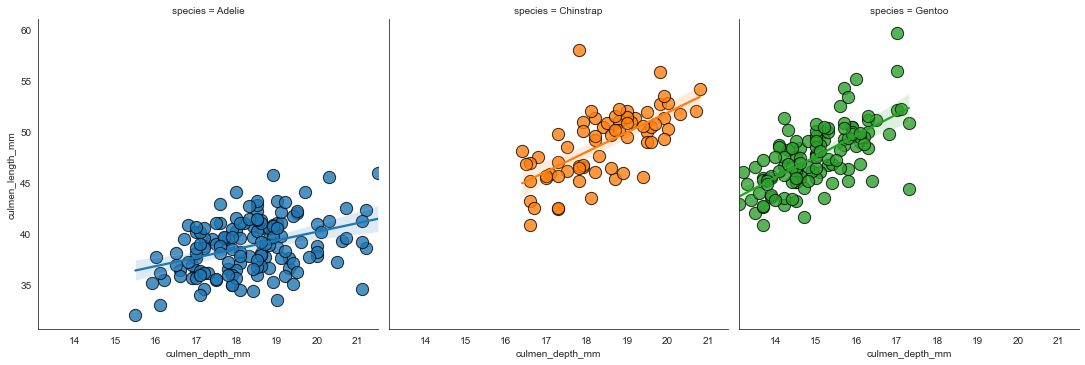

In [14]:
sns.lmplot(x='culmen_depth_mm', y='culmen_length_mm', 
           data=df, 
           hue='species',
           col='species',
           scatter_kws={'s': 150, 'edgecolor': 'black'}
           );

### `line_kws`

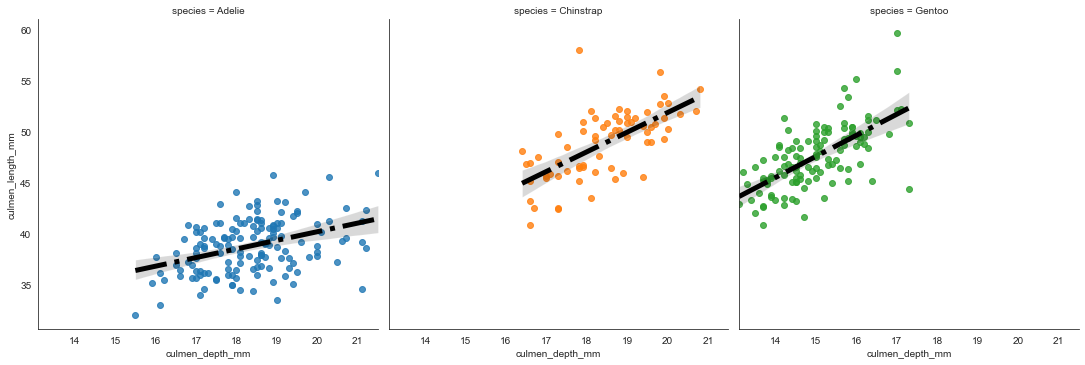

In [15]:
sns.lmplot(x='culmen_depth_mm', y='culmen_length_mm', 
           data=df, 
           hue='species',
           col='species',
           line_kws={'lw': 5, 'ls': '-.', 'color': 'black'}
           );

### FacetGrid Object

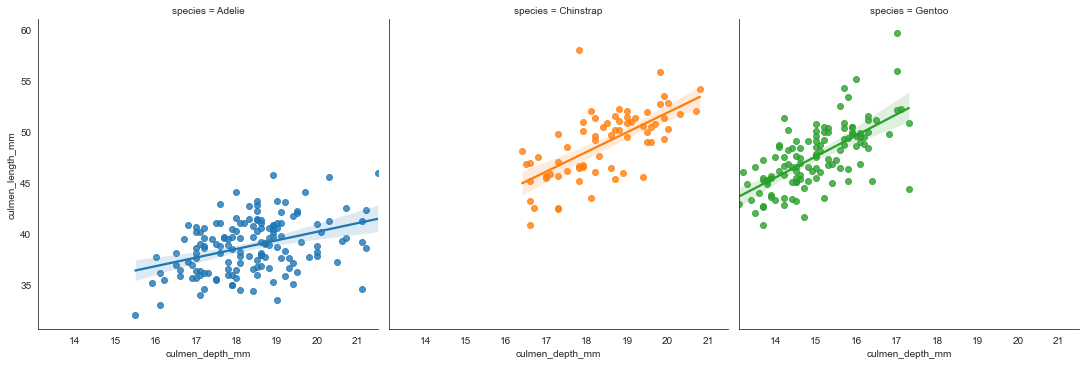

In [16]:
g = sns.lmplot(x='culmen_depth_mm', y='culmen_length_mm', 
               data=df, 
               hue='species', 
               col='species'
              );

In [17]:
type(g)

seaborn.axisgrid.FacetGrid

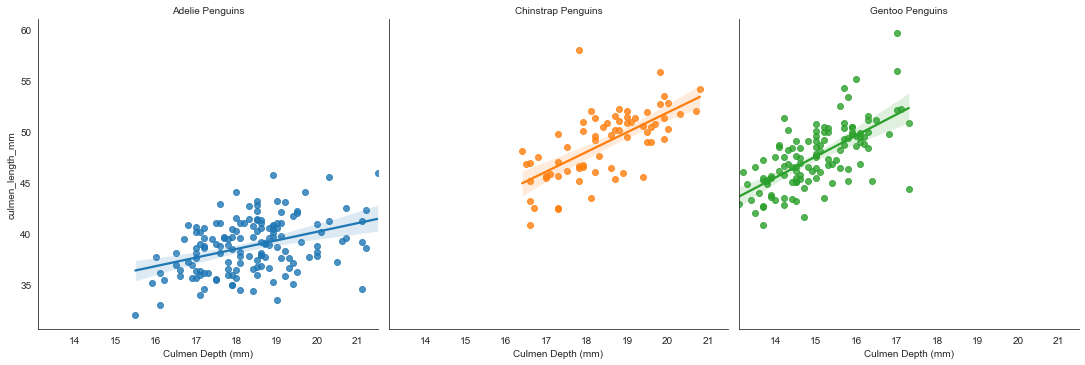

In [18]:
g = sns.lmplot(x='culmen_depth_mm', y='culmen_length_mm', 
               data=df, 
               hue='species', 
               col='species'
              )

g.set_titles(col_template='{col_name} Penguins')
g.set_xlabels('Culmen Depth (mm)');

## Examples, Thumbnail

In [19]:
from matplotlib import pyplot as plt

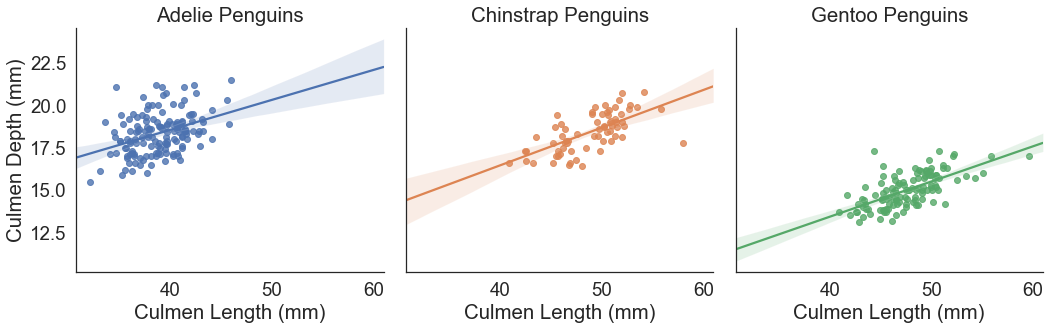

In [20]:
sns.set(style='white', font_scale=1.7)
g = sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', col='species', truncate=False)

g.set_titles('{col_name} Penguins')
g.set_xlabels('Culmen Length (mm)')
g.set_ylabels('Culmen Depth (mm)')
plt.tight_layout()
#plt.savefig('20lmplot_image_facetGridExample.png', dpi=200);

In [21]:
diamonds = sns.load_dataset('diamonds').sample(1000)

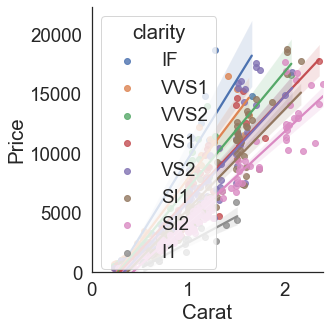

In [22]:
sns.lmplot(x='carat', y='price', data=diamonds, hue='clarity', legend=False)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.ylim(0, None)
plt.xlim(0, None)
plt.legend(loc=2, title='clarity')
plt.tight_layout()
#plt.savefig('20lmplot_image_tooManyLines.png', dpi=200);

(0.0, 22450.49708643234)

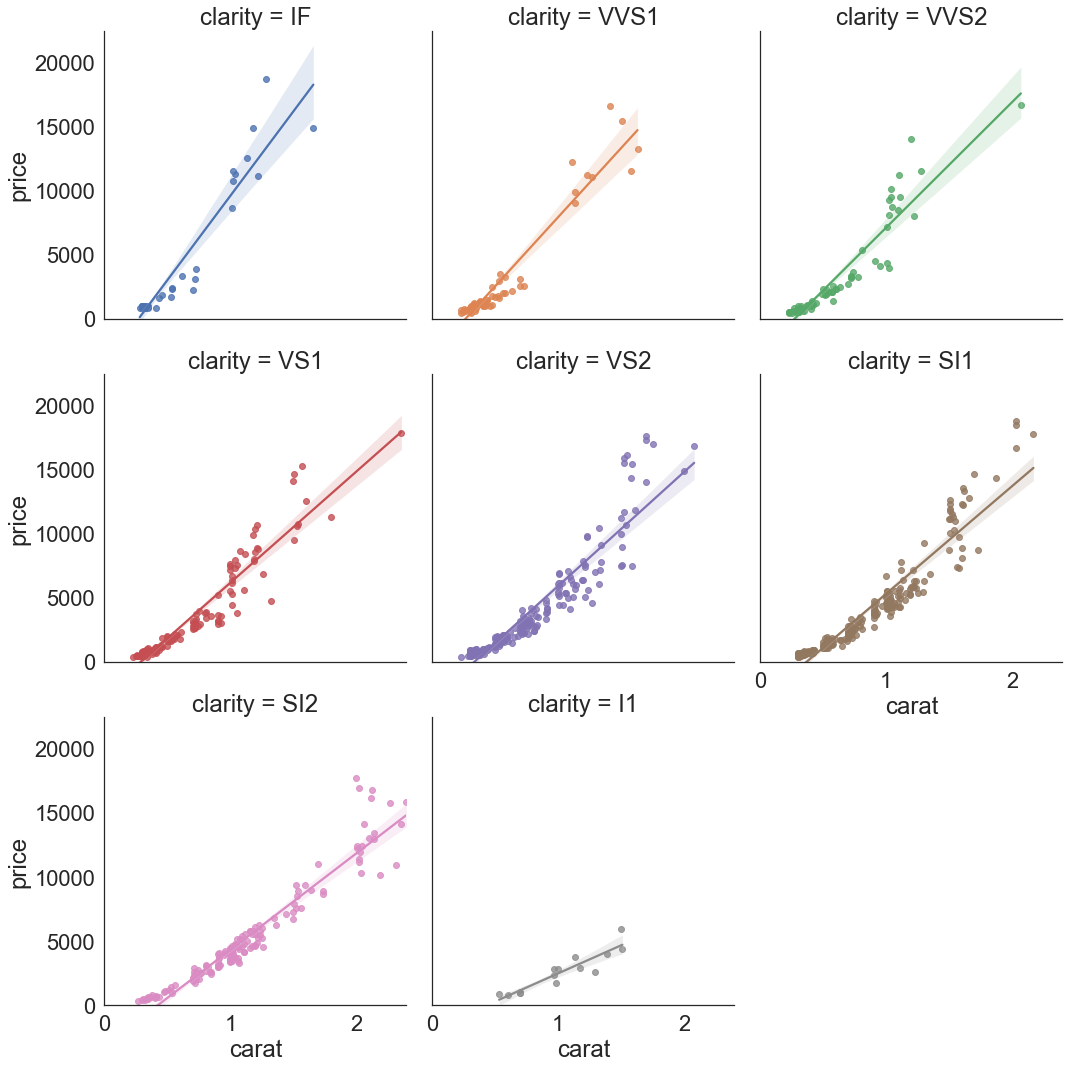

In [23]:
sns.set(style='white', font_scale=2)
sns.lmplot(x='carat', y='price', hue='clarity', data=diamonds, col='clarity', col_wrap=3)
plt.xlim(0, None)
plt.ylim(0, None)
#plt.savefig('20lmplot_image_tooManyLinesFacet.png', dpi=200);

### Thumb

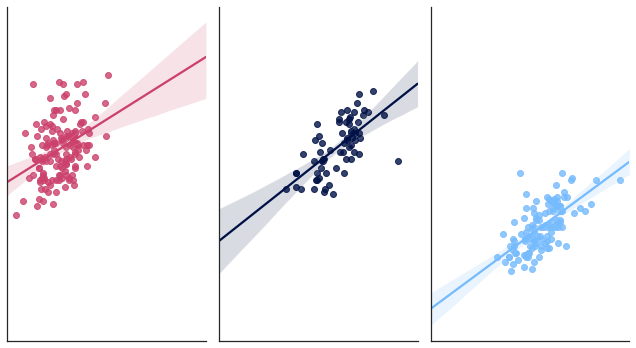

In [24]:
sns.set(style='white', font_scale=1)
g = sns.lmplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, 
               hue='species', col='species', truncate=False, aspect=.6,
               palette=['#cb416b','#001146', '#75bbfd']
              )

g.set_titles('')
g.set_xlabels('')
g.set_ylabels('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.savefig('20lmplot_image_thumb.png', dpi=200);